# 1. Tensorflow 기초

In [ ]:
import tensorflow as tf #tensorflow라는 library를 가져옴. as는 애칭을 의미함.
hello = tf.constant("hello, World!") #상수를 선엄함.
sess=tf.Session() #Session 클래스를 불러옴. 오퍼레이션이 실행되고 평가되는 환경을 만듬. 모든 코드는 Session 클래스를 생성함.
print(sess.run(hello)) #hello 상수를 출력함. 이때 print(hello)라고 하면 hello에 대한 설명만 출력됨(객체의 내용이 아닌 주소를 출력함) 실제 연산이 이루어지는 Session을 통해야 함.


In [17]:
# placehold 등 설명 추가예정
a= tf.constant(10)

b'hello, World!'


# 2. 선형회귀분석(renear regression)

일정한 입력과 출력을 기반으로 학습을 진행하고 새로운 입력에 대해 출력을 예측하는 모델.
학습을 위해 임의의 랜덤한 입력과 출력 데이터를 생성함.(출력=레이블)
이렇게 생성한 임의의 입출력 데이터를 기반으로 최적의 기울기(weight)와 편차(bias)를 찾는것이 목표.

## 2-1. 변수 간의 관계에 대한 모델

c:\users\ryan\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


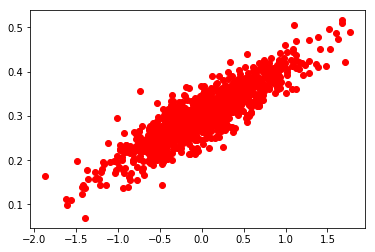

In [21]:
import numpy as np

num_points = 1000
vectors_set = []

for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55) # 예) np.random.normal(0.0,0.55,100) 평균0, 표준편차 0.55인 정규분포로 부터 난수 100개를 생성함

    # 랜덤한 데이터 생성을 위해 정규분포를 이용해서 그래프를 흔들어줍니다.
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03) 
    vectors_set.append([x1, y1])

# x_data는 입력을 의미합니다.
x_data = [v[0] for v in vectors_set]

# y_data는 레이블(출력)을 의미합니다.
y_data = [v[1] for v in vectors_set]

try:
  import matplotlib.pyplot as plt

  plt.plot(x_data, y_data, 'ro')
  plt.legend()
  plt.show()

except ImportError:
  print("Please install matplotlib to visualize embeddings.")

## 2-2.  비용함수와 경사 하강법 알고리즘

임의의 랜덤한 데이터로부터 최적의 기울기(W) 찾음.

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0 [ 0.37198886] [ 0.29148778] 0.0232173


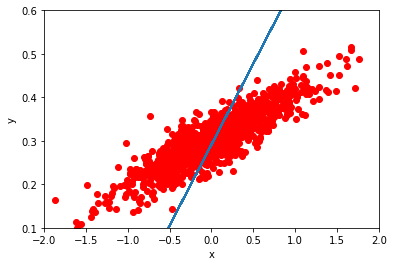

1 [ 0.2894516] [ 0.29418319] 0.0116648


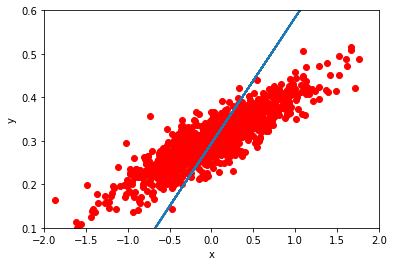

2 [ 0.23217635] [ 0.29623079] 0.00610053


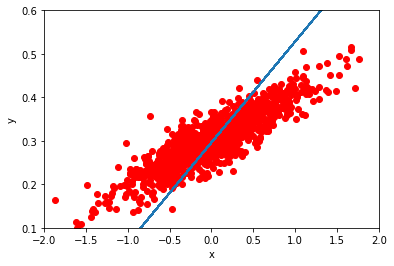

3 [ 0.19242682] [ 0.29765168] 0.00342054


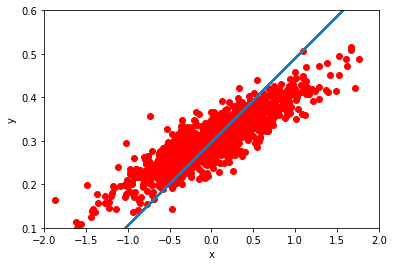

4 [ 0.16484028] [ 0.29863778] 0.00212972


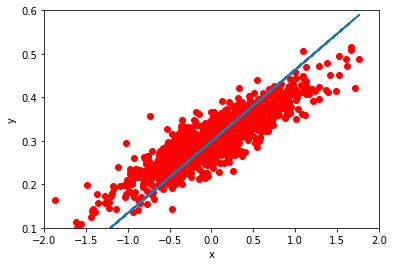

5 [ 0.14569499] [ 0.29932216] 0.001508


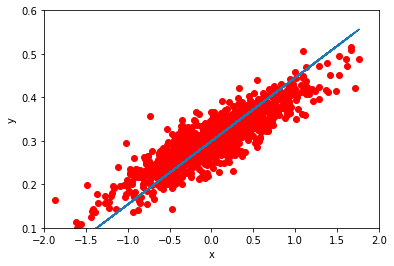

6 [ 0.13240799] [ 0.29979712] 0.00120855


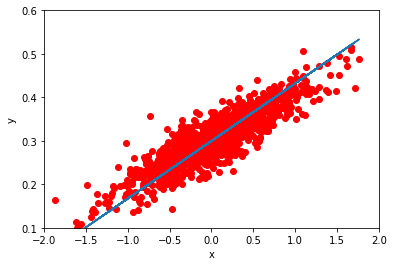

7 [ 0.12318669] [ 0.30012673] 0.00106432


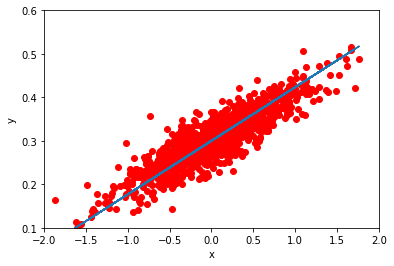

In [22]:
import tensorflow as tf


# tf.Variable은 TensorFlow에서 변수를 의미합니다.
# 아래 코드는 -1.0 ~ 1.0 사이에 랜덤한 수로 W의 초기값을 설정하겠다는 의미입니다.
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# 비용함수를 계산합니다.
loss = tf.reduce_mean(tf.square(y - y_data))

# 경사 하강법 알고리즘을 사용 
optimizer = tf.train.GradientDescentOptimizer(0.5)

# 알고리즘의 최저값을 찾습니다.
train = optimizer.minimize(loss)

# 모든 Variable은 초기화해서 사용해야 합니다.
init = tf.initialize_all_variables()

# 모델을 생성하고 실행시키도록 합니다.
sess = tf.Session()
sess.run(init)

for step in range(8):
    sess.run(train)
    print(step, sess.run(W), sess.run(b), sess.run(loss))
    # 산포도 그리기
    plt.plot(x_data, y_data, 'ro')
    # 직선 그리기
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    # x, y 축 레이블링을 하고 각 축의 최대, 최소값 범위를 지정합니다.
    plt.xlabel('x')
    plt.xlim(-2,2)
    plt.ylim(0.1,0.6)
    plt.ylabel('y')
    plt.show()

## 학습 데이터 테스트

학습을 마친 후 새로운 데이터에 대한 정확한 분류가 되는지 확인합니다. 

In [30]:

test_set = [1,2,3]
print (sess.run(y, feed_dict={x_data:test_set}))

[ 0.27268755  0.32359779  0.29364809  0.23305315  0.29165652  0.39296994
  0.10154276  0.38677549  0.30849567  0.22742948  0.34656617  0.27326855
  0.38557917  0.31055552  0.40071937  0.34479919  0.20988855  0.22371092
  0.24938741  0.35646176  0.37319806  0.23999666  0.22793902  0.34858039
  0.39058906  0.3000564   0.35398096  0.35837466  0.2131806   0.33365071
  0.27823189  0.28504938  0.28120634  0.20740646  0.25881347  0.27998415
  0.23137593  0.32445908  0.3359462   0.14679013  0.1925104   0.4025121
  0.30686852  0.31356558  0.26472932  0.2970911   0.42579645  0.29175854
  0.31433493  0.28619877  0.34917867  0.27711955  0.27079138  0.30202532
  0.37681979  0.27611479  0.35481292  0.32486603  0.28683975  0.25770238
  0.32589528  0.35293603  0.27736491  0.32970333  0.41423863  0.41410667
  0.27168217  0.31965914  0.24925403  0.27315626  0.24169412  0.33272561
  0.30529919  0.29219902  0.28208131  0.33600974  0.43556711  0.32749969
  0.25958419  0.26558426  0.294411    0.34402999  0.

# 참고자료

타이틀,저자(번역),자료명,출처(출판사)
1. 모두의 머신러닝,김성훈,선형회귀 분석,https://hunkim.github.io/ml/
2. 임베디드 개발자의 TensorFlow 학습하기,jybaek,선형회귀 분석,https://www.gitbook.com/book/jybaek/ml/details
3. 텐서플로 첫걸음,조로디토레스(박해선),회귀분석,한빛미디어